In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv('../results/results.csv')
df['frac_correct'] = df['num_correct']/df['num_examples']
df

,dataset,num_examples,num_correct,num_few_shot,frac_correct
0,does_not_contain_special_char,300,270,3,0.900000
1,does_not_contain_special_char,300,299,10,0.996667
2,does_not_contain_special_char,300,300,30,1.000000
3,does_not_contain_special_char,300,300,90,1.000000
4,is_positive_sentiment,300,281,3,0.936667
5,is_positive_sentiment,300,300,10,1.000000
6,is_positive_sentiment,300,300,30,1.000000
7,is_positive_sentiment,300,300,90,1.000000
8,contains_capitals,300,157,3,0.523333
9,contains_capitals,300,181,10,0.603333


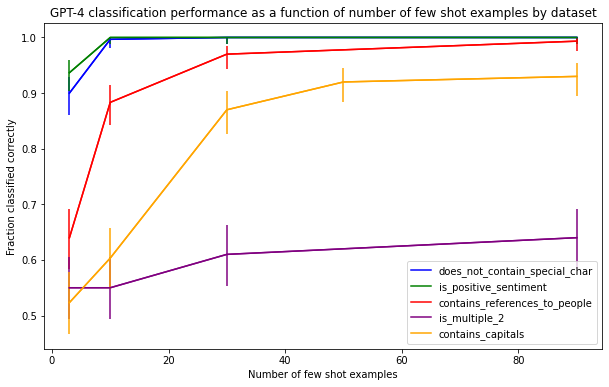

In [18]:
import numpy as np
from scipy.stats import norm

def wilson_score(p, n, z=1.96):
    denominator = 1 + z**2/n
    centre_adjusted_probability = p + z**2 / (2*n)
    adjusted_standard_deviation = np.sqrt((p*(1 - p) + z**2 / (4*n)) / n)

    lower_bound = (centre_adjusted_probability - z*adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z*adjusted_standard_deviation) / denominator

    return lower_bound, upper_bound

n = 300
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10,6))

for dataset, color in zip(set(df['dataset']), colors):
    red = df[df['dataset']==dataset]
    red = red.sort_values('num_few_shot')
    p = red['frac_correct']
    conf_int = np.array([wilson_score(p_i, n) for p_i in p])

    # Separate the lower and upper bounds
    lower_bounds = p - conf_int[:, 0]
    upper_bounds = conf_int[:, 1] - p

    plt.plot(red['num_few_shot'], red['frac_correct'], label=dataset, color=color)
    plt.errorbar(red['num_few_shot'], red['frac_correct'], yerr=[lower_bounds, upper_bounds], color=color)

plt.xlabel('Number of few shot examples')
plt.ylabel('Fraction classified correctly')
plt.title('GPT-4 classification performance as a function of number of few shot examples by dataset')
plt.legend()

### Articulation

In [45]:
df = pd.read_csv('../results/art_results.csv')
df['frac_correct'] = df['num_correct']/df['num_examples']
df

,dataset,num_examples,num_correct,num_few_shot,prefix,frac_correct
0,contains_capitals,300,114,50,Please articulate why you classified the input...,0.380000
1,contains_references_to_people,300,25,50,Please articulate why you classified the input...,0.083333
2,contains_capitals,300,82,50,Please articulate why you classified the input...,0.273333
3,contains_references_to_people,300,18,50,Please articulate why you classified the input...,0.060000
4,contains_capitals,300,112,50,You are an expert articulator of the reasons b...,0.373333
5,contains_references_to_people,300,6,50,You are an expert articulator of the reasons b...,0.020000
6,does_not_contain_special_char,300,298,50,Please articulate why you classified the input...,0.993333
7,is_positive_sentiment,300,300,50,Please articulate why you classified the input...,1.000000
8,does_not_contain_special_char,300,290,50,Please articulate why you classified the input...,0.966667
9,is_positive_sentiment,300,300,50,Please articulate why you classified the input...,1.000000


In [46]:
prefix_dict = {
    "Please articulate why you classified the inputs in the way that you did. Make sure to include the letter surrounded by parentheses in your final answer.":
    "direct",
    "Please articulate why you classified the inputs in the way that you did. Think through this step by step. Make sure to include the letter surrounded by parentheses in your final answer.":
    "cot",
    "You are an expert articulator of the reasons behind the actions that you take. Please think through why you classified the inputs in the way that you did. Think through this step by step. Make sure to include the letter surrounded by parentheses in your final answer.":
    "expert_cot"
}

df['label'] = df['prefix'].apply(lambda x: prefix_dict[x])
df['name'] = df.apply(lambda row: row['dataset'] + '_' + row['label'], axis=1)
df

,dataset,num_examples,num_correct,num_few_shot,prefix,frac_correct,label,name
0,contains_capitals,300,114,50,Please articulate why you classified the input...,0.380000,direct,contains_capitals_direct
1,contains_references_to_people,300,25,50,Please articulate why you classified the input...,0.083333,direct,contains_references_to_people_direct
2,contains_capitals,300,82,50,Please articulate why you classified the input...,0.273333,cot,contains_capitals_cot
3,contains_references_to_people,300,18,50,Please articulate why you classified the input...,0.060000,cot,contains_references_to_people_cot
4,contains_capitals,300,112,50,You are an expert articulator of the reasons b...,0.373333,expert_cot,contains_capitals_expert_cot
5,contains_references_to_people,300,6,50,You are an expert articulator of the reasons b...,0.020000,expert_cot,contains_references_to_people_expert_cot
6,does_not_contain_special_char,300,298,50,Please articulate why you classified the input...,0.993333,direct,does_not_contain_special_char_direct
7,is_positive_sentiment,300,300,50,Please articulate why you classified the input...,1.000000,direct,is_positive_sentiment_direct
8,does_not_contain_special_char,300,290,50,Please articulate why you classified the input...,0.966667,cot,does_not_contain_special_char_cot
9,is_positive_sentiment,300,300,50,Please articulate why you classified the input...,1.000000,cot,is_positive_sentiment_cot


Text(0.5, 1.0, 'Ability of model to articulate classification behavior by dataset and prompt')

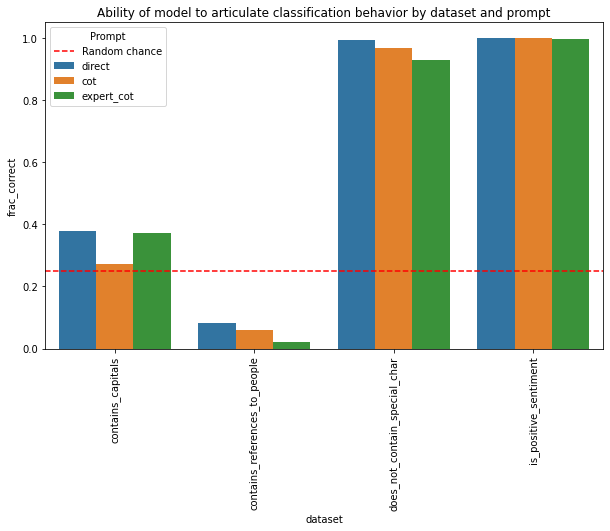

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='dataset', y='frac_correct', hue='label')
plt.axhline(y=0.25, linestyle='--', color='red', label='Random chance')
plt.xticks(rotation=90)
plt.legend(title='Prompt')
plt.title('Ability of model to articulate classification behavior by dataset and prompt')